### Graduate Admission

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
DF  = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [4]:
df = DF.copy()

In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No null values or missing data..

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


* Every column in the Data-Frame is Numerical, it's superb to start Visualization

In [7]:
df.iloc[:,-1].head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

###### Here you can observe that the Output column is in Continous values of Percentage of chance to get the admission.
> so here we can make it classification probelm or Regression Problem.. by our own convinience

In [8]:
# Let's take the 'Chance of Admit' column into output variable
output = df.iloc[:,-1].copy()

In [11]:
df = df.set_index('Serial No.')

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
corr = df.corr()['Chance of Admit '].sort_values()

In [14]:
corr

Research             0.545871
LOR                  0.645365
SOP                  0.684137
University Rating    0.690132
TOEFL Score          0.792228
GRE Score            0.810351
CGPA                 0.882413
Chance of Admit      1.000000
Name: Chance of Admit , dtype: float64

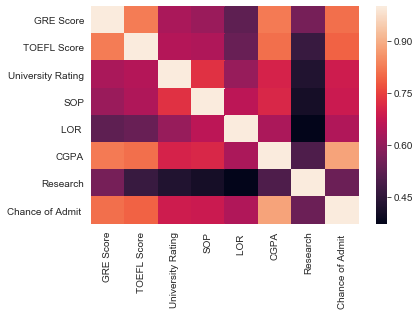

In [17]:
sns.set_style('darkgrid')
sns.heatmap(df.corr())

Here mostly Every column has more than 50% impact on the chance of Admission
* Let's do analysis on all the columns sequentially

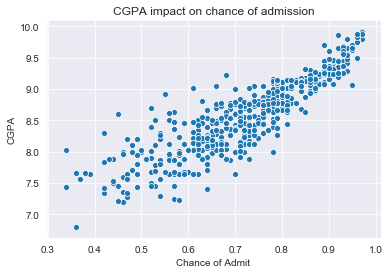

In [40]:
sns.scatterplot(y = 'CGPA',x='Chance of Admit ',data=df)
plt.title('CGPA impact on chance of admission')
plt.show()

* It shows that, CGPA has linear impact on Chance of admit
* As we can see it has 88% of correlation between them..mostly this feature is enough to predict the Output, but at the end we will do PCA and try to get the results too

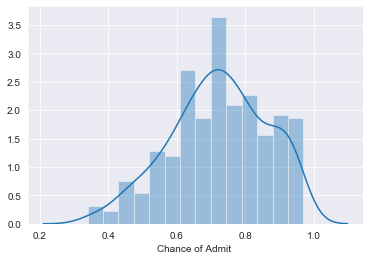

In [24]:
sns.distplot(df['Chance of Admit '])
plt.show()

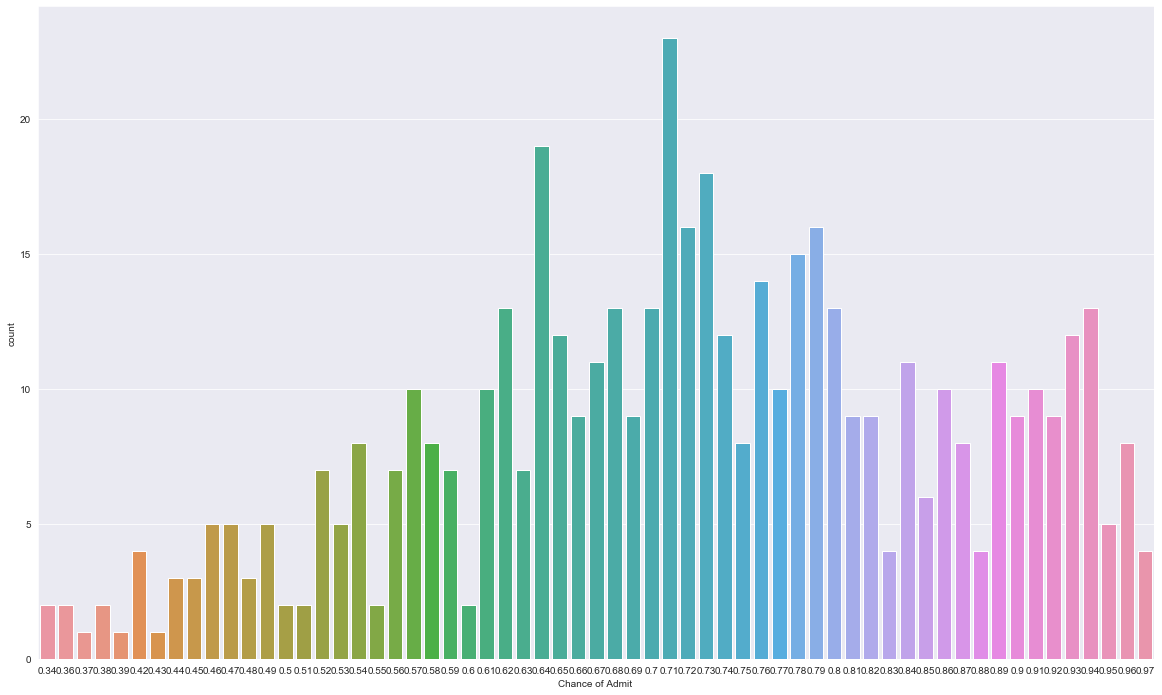

In [36]:
plt.figure(figsize=(20,12))
sns.countplot(df['Chance of Admit '])
plt.show()

> It almost looks like Normal Distrubution... 
* we can Use Linear Regression

> GRE score

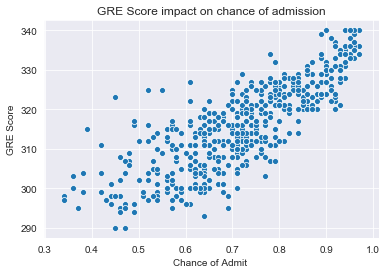

In [41]:
sns.scatterplot(y = 'GRE Score',x='Chance of Admit ',data=df)
plt.title('GRE Score impact on chance of admission')
plt.show()

Let's do the Pairplot.. simply we will get all the Info. of columns

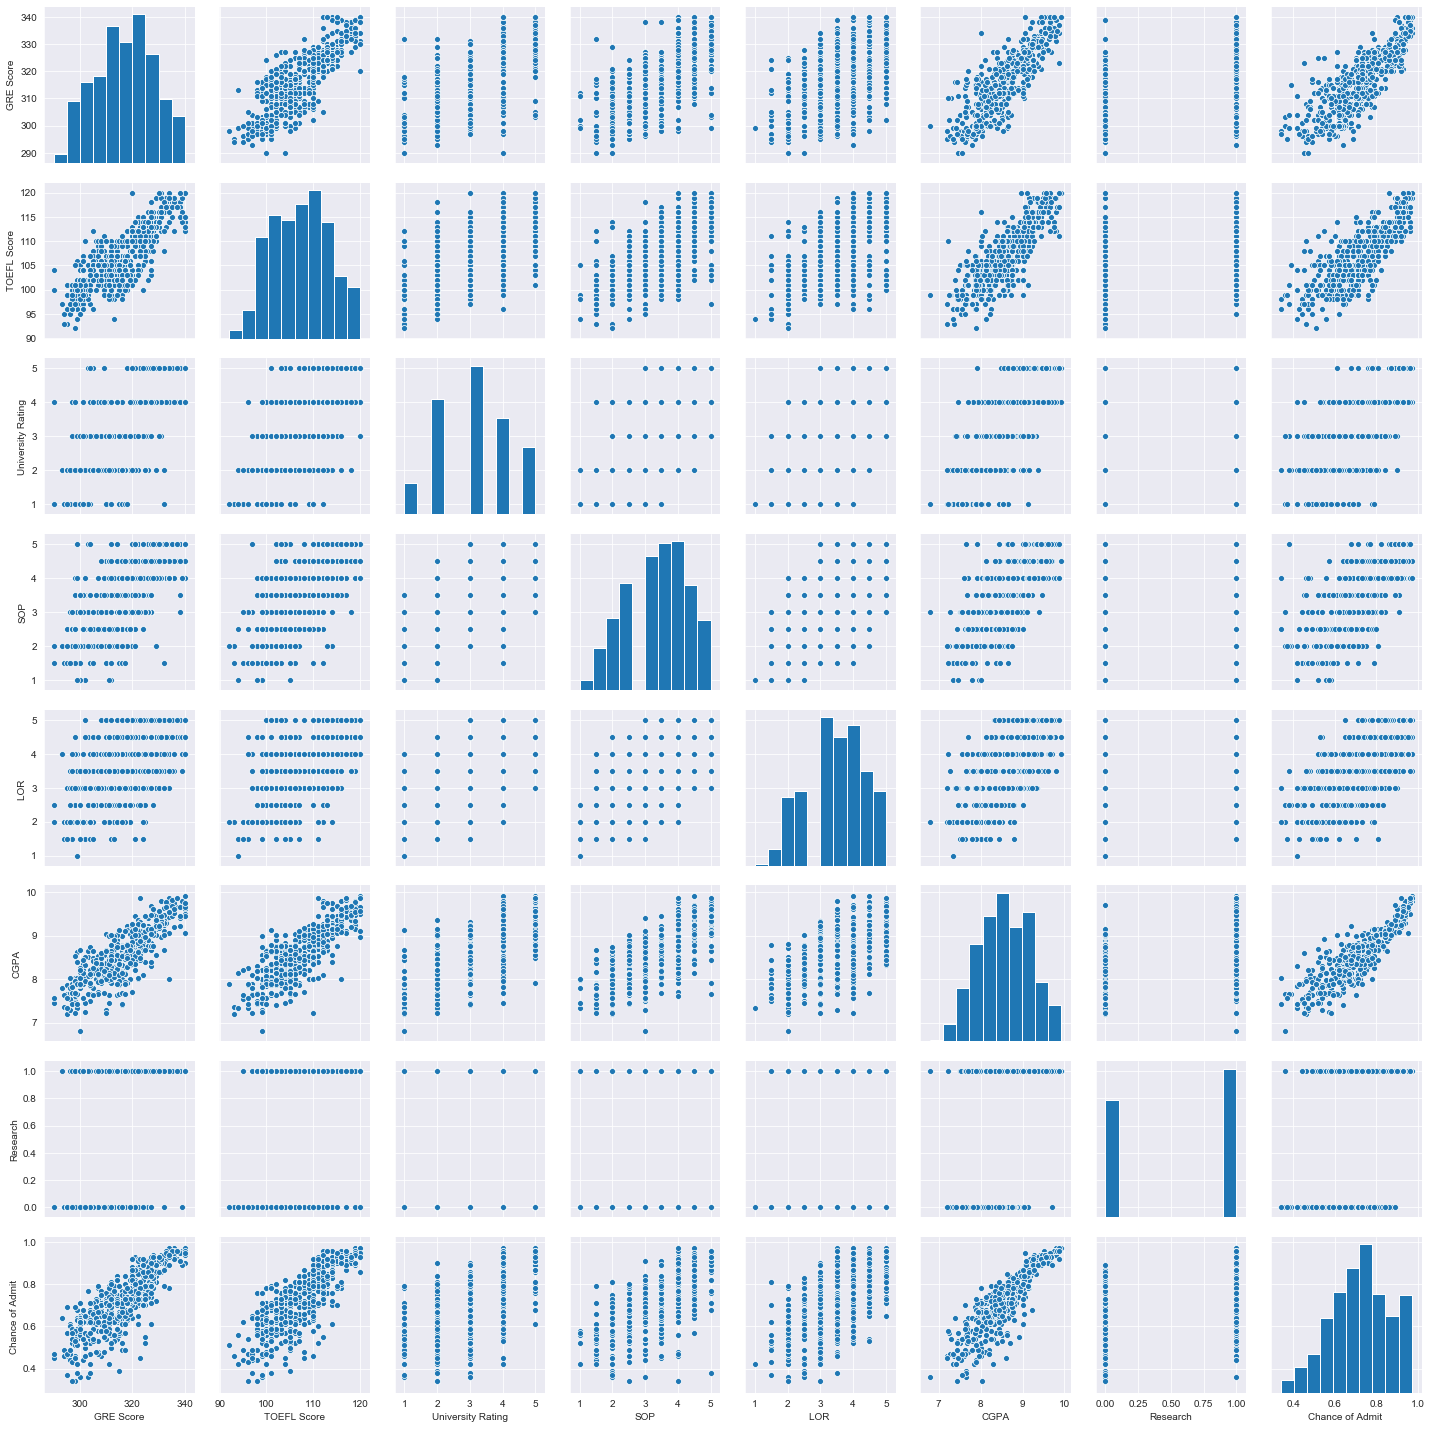

In [42]:
pp = sns.pairplot(df)
plt.show()

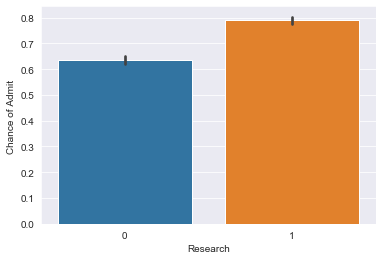

In [45]:
sns.barplot(df.Research,df['Chance of Admit '])

A slight Difference between People Who did research and who didn't

We will classify the 'Chance of Admit ' to 3 classes that {'High','Moderate','Low'} by
* high : chance of admit > 0.75
* Moderate : 0.4 < chance of admit < 0.75
* Low : chance of Admit < 0.4

In [49]:
def fun2class(x):
    if x >= 0.75 :
        return 2
    elif x > 0.4 and x < 0.75:
        return 1
    elif x < 0.4:
        return 0

In [50]:
df['COAC'] = df['Chance of Admit '].apply(fun2class)

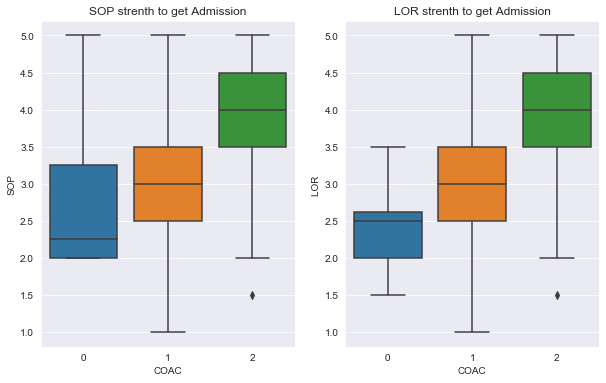

In [66]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
k1 = sns.boxplot(x=df['COAC'],y=df['SOP'])
k1.axes.set_title('SOP strenth to get Admission')

plt.subplot(1,2,2)
k1 = sns.boxplot(x=df['COAC'],y=df['LOR '])
k1.axes.set_title('LOR strenth to get Admission')
plt.show()

> Here we can observe that 
* whose SOP and LOR strength is higher than 4 has high rate of Admission
* whose SOP and LOR strength is lower than 2.1 has lowest rate of Admission

Let's Understand the Admission by 
> University Rating

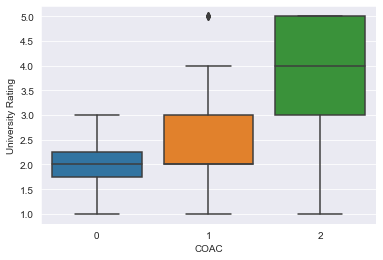

In [71]:
sns.boxplot(x=df['COAC'],y=df['University Rating'])

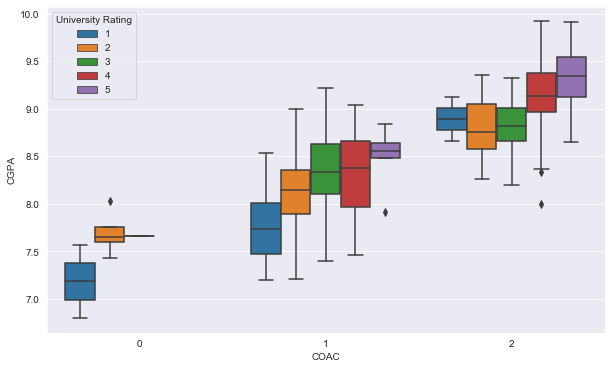

In [75]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['COAC'],y=df['CGPA'],hue=df['University Rating'])

* students who got the Lowest CGPA (<7.6) got the Universities which has very low Ranking
* students who got the above 7.5 GCPA joined in mostly all range universities but majorly joined in 2,3,4 rated universities
* Students who has highest CGPA (>8.5) joined in Highest rated Universities

> applying Regression and Classification
* Model creation

In [76]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,COAC
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,2
2,324,107,4,4.0,4.5,8.87,1,0.76,2
3,316,104,3,3.0,3.5,8.00,1,0.72,1
4,322,110,3,3.5,2.5,8.67,1,0.80,2
5,314,103,2,2.0,3.0,8.21,0,0.65,1


##### >> Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
from sklearn.model_selection import train_test_split

In [126]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [111]:
xt,XT,yt,YT = train_test_split(df.iloc[:,:-2],df.iloc[:,-2],test_size=0.25)

In [112]:
LRmod = LinearRegression()

In [113]:
LRmod.fit(xt,yt)
YTP = LRmod.predict(XT)
print(f'MSD : {round(mean_squared_error(YT,YTP),5)}')
print(f'MAE : {round(mean_absolute_error(YT,YTP),5)}')

MSD : 0.00383
MAE : 0.04327


In [114]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [115]:
Pmod = PCA(2)

In [116]:
x = StandardScaler().fit_transform(df.iloc[:,:-2])
x = pd.DataFrame(x)

In [117]:
# Pmod.fit_transform(x)
X = pd.DataFrame(Pmod.fit_transform(x))

<BarContainer object of 2 artists>

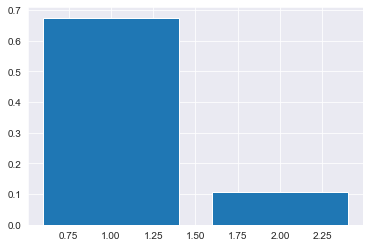

In [118]:
plt.bar(range(1,3),Pmod.explained_variance_ratio_)

> Now Applying the Linear Regression to the PCA data

In [119]:
xt,XT,yt,YT = train_test_split(X,df.iloc[:,-2],test_size = 0.25)

In [120]:
LRmod.fit(xt,yt)
YTP = LRmod.predict(XT)
print(f'MSD : {round(mean_squared_error(YT,YTP),5)}')
print(f'MAE : {round(mean_absolute_error(YT,YTP),5)}')

MSD : 0.00458
MAE : 0.05094


##### >>  Logistic Regression

In [121]:
from sklearn.linear_model import LogisticRegression

In [123]:
xt,XT,yt,YT = train_test_split(df.iloc[:,:-2],df.iloc[:,-1],test_size = 0.25)

In [124]:
Logmod = LogisticRegression()

In [130]:
Logmod.fit(xt,yt)
YTP = Logmod.predict(XT)
print(f'Accuracy : {accuracy_score(YT,YTP)}')

Accuracy : 0.824


Now we will try with only two Features which has highest correlation

In [133]:
df.corr()['COAC'].sort_values(ascending = False)

COAC                 1.000000
Chance of Admit      0.836641
CGPA                 0.761914
GRE Score            0.703568
TOEFL Score          0.682635
University Rating    0.613824
SOP                  0.590534
LOR                  0.541297
Research             0.501935
Name: COAC, dtype: float64

We use CGPA, GRE score, TOEFL Score for next Model

In [144]:
xt,XT,yt,YT = train_test_split(df.iloc[:,[0,1,5]],df.iloc[:,-1],test_size = 0.25)

In [145]:
Logmod.fit(xt,yt)
YTP = Logmod.predict(XT)
print(f'Accuracy : {accuracy_score(YT,YTP)}')

Accuracy : 0.8


We can Apply SVM technique her but before that we have to make the Classification columns with only two unique values...
* Greater than 0.5 : YES
* Less than 0.5 : NO

> Thank You
* Suggestions are Welcome